<a href="https://colab.research.google.com/github/BudamaLakshmiPragnamanasvi/AIML-Tutorials/blob/main/Module_3_Lab_2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
### MODULE 3: CLASSIFICATION-1
### LAB-2 : Implementing KNN from scratch and visualize Algorithm performance

---

# **Section 1: Implementing KNN**

In the last lab we had started discussing about KNN or K Nearest Neighbour method for clasification. We used the pre-built scikit-learn library for KNN. Now let's see how to implement this algorithm from scratch  

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [1]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        # compute and store L2 distance
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

In [2]:
def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."

    # loop over all observations
    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

**Note** : If k = 1 then the algorithm will simply return the label of the nearest neighbour. When we give k > 1 the most common label out of the given labels in the k neighbours will be selected.The code for 1 NN is given as follows and does not have to be so complicated.

In [3]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query  # find the difference between features. Numpy automatically takes care of the size here
  sq = diff*diff # square the differences
  dist = sq.sum(1) # add up the squares
  label = trainlabel[np.argmin(dist)] # our predicted label is the label of the training data which has the least distance from the query
  return label

Let us define a metric 'Accuracy' to see how good our learning algorithm is. Accuracy is the ratio of the number of correctly classified samples to the total number of samples. The higher the accuracy, the better the algorithm.

In [4]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum() # count the number of times the groundtruth label is equal to the predicted label.
  return correct/len(gtlabel)

## Section 1.1 - Iris Dataset
Let's try it out on Iris Dataset present in the scikit learn library

In [7]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/16rRvmiVTQGCfqPlxxnfdiMjN0bNhECPccOFyEnhDuaM#gid=0


In [8]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [9]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 94.0 %


Voila! You have implemented your own version of the K-Nearest Neighbours algorithm, which works very well on the Iris Dataset. Congratulations!  

Now try out the sklearn implementation and compare your results.  

In [10]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


##  Section 1.2: Weighted NN
For KNN, If k is too small, the algorithm would be more sensitive to outliers. If k is too large, then the neighborhood may include too many points from other classes. We also take the label with max votes in the neighbourhood. Another choice can be that instead of giving equal weights to each of the neighbours we can give weighted points in the neighbourhood. So we weigh points by the inverse of their distance. Therefore, closer points will be given a higher priority as compared to the far off points.

An easy way to implement this is by specifying the 'weights' parameter as distance when defining the sklearn KNN function. For more information go through this [site](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

In [48]:
## TASK
## Modify the KNN function you wrote to return all the K-nearest neighbours along with their distances,
## instead of just the output that was most common. You don't need to find out accuracy, just modify the function
## and return the k-nearest neighbours and distances.
def knn_with_distances(X_train, y_train, X_test, k=3):
    distances = []
    neighbors = []

    # Loop through each test sample
    for test_sample in X_test:
        # Compute the distance between the test sample and each training sample
        dist = np.linalg.norm(X_train - test_sample, axis=1)

        # Get the indices of the k-nearest neighbors
        k_indices = np.argsort(dist)[:k]

        # Get the k-nearest neighbor distances and corresponding labels
        k_neighbors = y_train[k_indices]
        k_distances = dist[k_indices]

        # Store the neighbors and distances for this test sample
        neighbors.append(list(zip(k_neighbors, k_distances)))
        distances.append(k_distances)

    return neighbors, distances



# **Section 2: Visualizing Data**  

We will look into something called **Voronoi** diagrams.  

**Note**: Ideally, we should perform data visualization to see what the data looks like before we apply any Machine Learning algorithm.  Only for the purpose of this lab session, we're explaining it after you've applied KNN.

### Voronoi Diagrams  

In simple terms, Voronoi diagrams help you to visualize the dataset by partioning the plane into regions that are close to a given set of points. These regions are also called Voronoi cells.  

Note that the cells/regions depend on the Distance metric being used. One way of interpreting this is by understanding that the distance metric decides the degree to which a 'point' or 'seed' in the Voronoi diagram has influence.  For each seed there is a corresponding region, called a Voronoi cell, consisting of all points of the plane closer to that seed than to any other.

This [link](https://en.wikipedia.org/wiki/Voronoi_diagram#Illustration) provides a wonderful illustration of Voronoi plots for 20 points in two cases: (1) Using Euclidean distance, and (2) Using Manhattan distance.  



Since our Iris data is 4-dimensional (as it has 4 attributes), we need to convert into a form that can be represented in 2-D.   

While there are methods to visualize data higher than 2-dimensions, that is beyond scope for now.  

For simplicity, we just take the first two columns of the iris dataset attributes and observe the Voronoi diagram generated for that.  
Alternatively, one can also perform PCA (Principal Component Analysis), to reduce the 4D data to just two dimensions.

In [12]:
#@title Plotting Voronoi regions
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite voronoi regions in a 2D diagram to finite
    regions.

    Parameters
    ----------
    vor : Voronoi
        Input diagram
    radius : float, optional
        Distance to 'points at infinity'.

    Returns
    -------
    regions : list of tuples
        Indices of vertices in each revised Voronoi regions.
    vertices : list of tuples
        Coordinates for revised Voronoi vertices. Same as coordinates
        of input vertices, with 'points at infinity' appended to the
        end.

    """

    if vor.points.shape[1] != 2:
        raise ValueError("Requires 2D input")

    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max()

    # Construct a map containing all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    # Reconstruct infinite regions
    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            # finite region
            new_regions.append(vertices)
            continue

        # reconstruct a non-finite region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                # finite ridge: already in the region
                continue

            # Compute the missing endpoint of an infinite ridge

            t = vor.points[p2] - vor.points[p1] # tangent
            t /= np.linalg.norm(t)
            n = np.array([-t[1], t[0]])  # normal

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, n)) * n
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        # sort region counterclockwise
        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:,1] - c[1], vs[:,0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        # finish
        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)

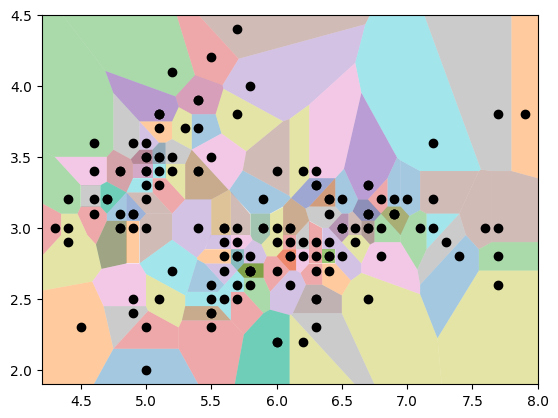

In [13]:
## Plotting Voronoi regions for the Iris dataset

points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
  points.append([xpts[i],ypts[i]])
# print(points)
points = np.array(points)
# compute Voronoi tesselation
vor = Voronoi(points)

regions, vertices = voronoi_finite_polygons_2d(vor)

for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:,0], points[:,1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)

plt.show()

## Section 2.2: Understanding Decision Boundaries  
So you have seen the Voronoi diagram of the dataset, implemented KNN, and also seen your algorithm's performance in terms of accuracy? Impressive!  
Wouldn't it also be great to know how exactly these 'votes' or neighbours are decided through some kind of visualization?  


### Decision Boundary

While the Voronoi diagram gave us a good idea of the points present in our dataset, to understand how KNN performed on our dataset we can plot decision boundaries. Decision boundaries, as the name suggests, divide the plane into different regions of classification.  

Note that here again, for simplicity, we have only considered first two attributes of the DataFrame (ie, Sepal Length and Sepal Width).  

In [14]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02  # step size in the mesh

  # Create color maps
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      # we create an instance of Neighbours Classifier and fit the data.
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      # Plot the decision boundary. For that, we will assign a color to each
      # point in the mesh [x_min, x_max]x[y_min, y_max].
      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      # Put the result into a color plot
      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      # Plot also the training points
      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


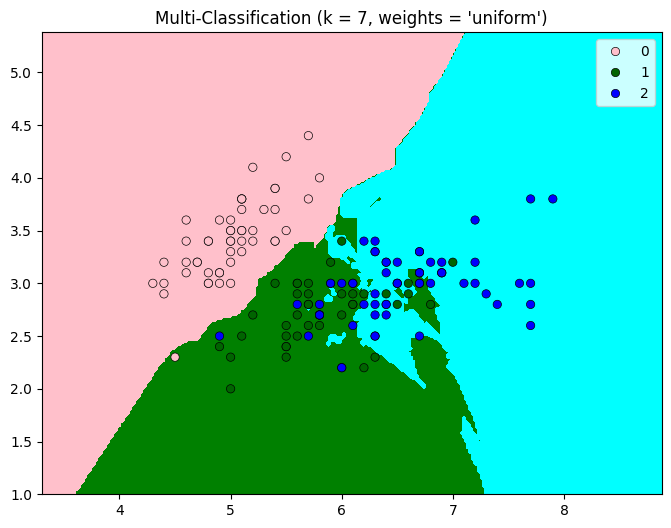

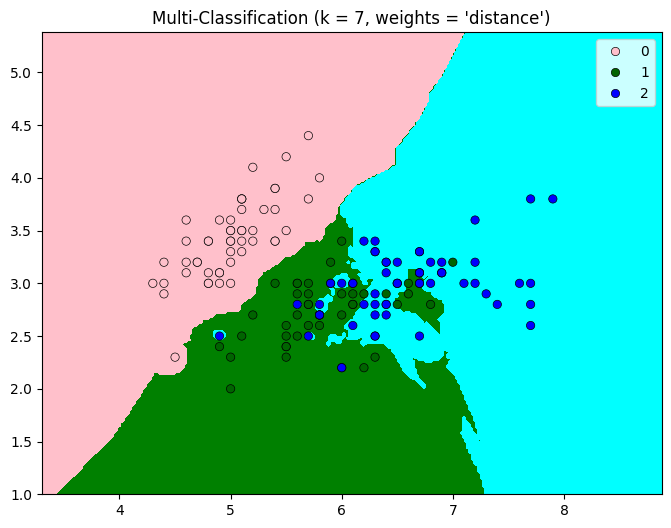

In [15]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

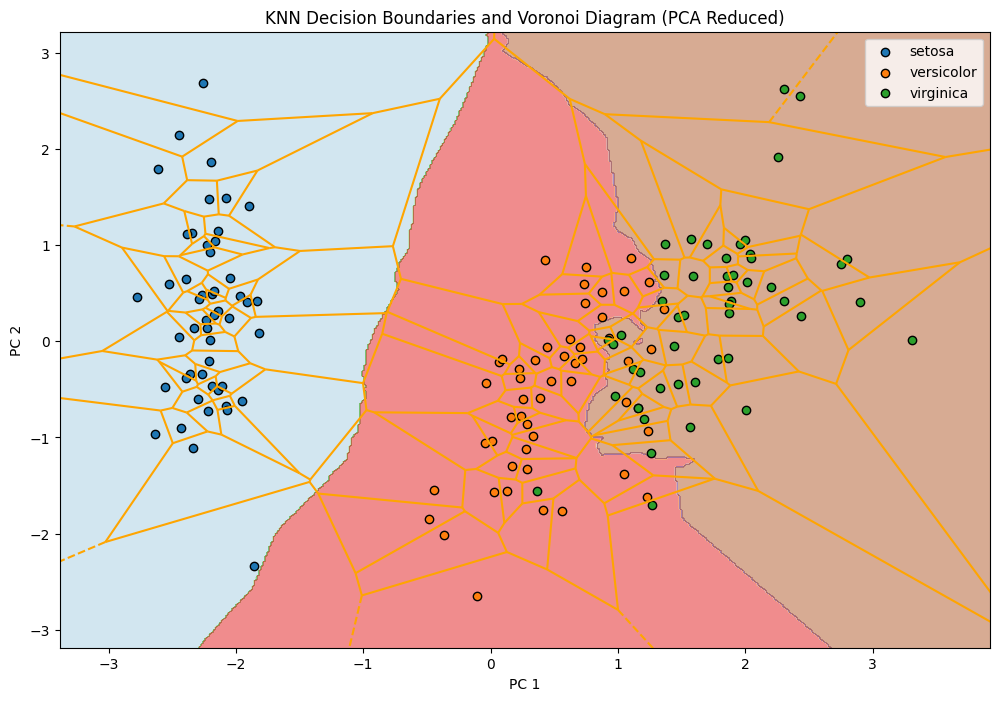

In [17]:
## TASK-2
## In the above cells, we saw the Voronoi diagram of the data and plotted the KNN decision boundaries
## by only considering two attributes of the dataset. You must be already familiar with PCA.
## Apply PCA on the dataset above to reduce it to two dimensions.
## Plot the Voronoi diagram and Decision boundaries after that.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from scipy.spatial import Voronoi, voronoi_plot_2d

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca, y)

# Create a mesh grid for plotting
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500), np.linspace(y_min, y_max, 500))

# Predict on the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Generate Voronoi diagram
vor = Voronoi(X_pca)

# Plot decision boundaries and Voronoi diagram
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)
voronoi_plot_2d(vor, ax=plt.gca(), show_points=False, show_vertices=False, line_colors='orange', line_width=1.5)

# Scatter plot of the data
for i, target_name in enumerate(iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=target_name, edgecolor='k')

plt.title("KNN Decision Boundaries and Voronoi Diagram (PCA Reduced)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.legend()
plt.show()


## Section 2.3: Confusion Matrix  
In classification problems, a confusion matrix, also known as an error matrix, is a table that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class.

In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
# print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,All
True,,,,
0,13,0,0,13
1,0,22,0,22
2,0,3,12,15
All,13,25,12,50


Text(0.5, 23.52222222222222, 'Predicted label')

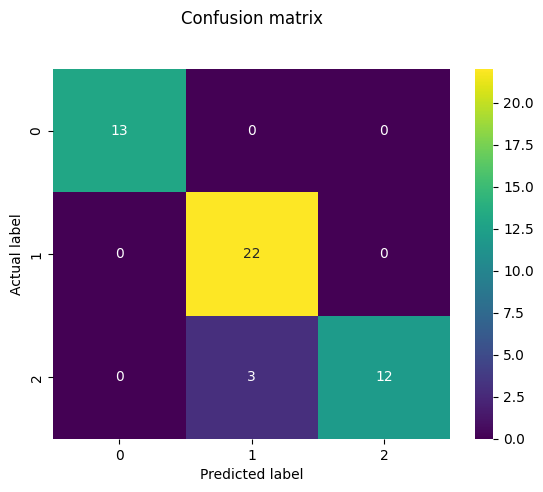

In [20]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Section 2.4: Classification Report

Precision, Recall, and F1-Score are other metrics besides accuracy that one might look for in an algorithm.  Depending on the use-case, one might consider one metric more important than the other.  

Note: *T-> True, F->False, P->Positive, N->Negative*
    
Mathematically, Accuracy is :  

$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$  

**Precision**: The accuracy of positive predictions


$Precision = \frac{TP}{TP+FP}$

**Recall**:Fraction of positives that were correctly identified


$Recall = \frac{TP}{TP+FN}$


**F1-score**: Harmonic mean of precision and recall  


$F1 = \frac{2*Precision*Recall}{Precision+Recall} = \frac{2*TP}{2*TP+FP+FN}$  



In [21]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.94        22
           2       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50



### **Car Evaluation Dataset**

In [22]:
# Upload the Car evaluation data CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [23]:
car_df = pd.read_csv('car_evaluation.csv')
car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [25]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=car_df)

https://docs.google.com/spreadsheets/d/1fmq4JYueawr-7_rd6kOpOuQ6DpIpWtRdlh0QMgiHiP4#gid=0


In [26]:
for x in car_df.columns:
  # print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [27]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [28]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 89.88 %


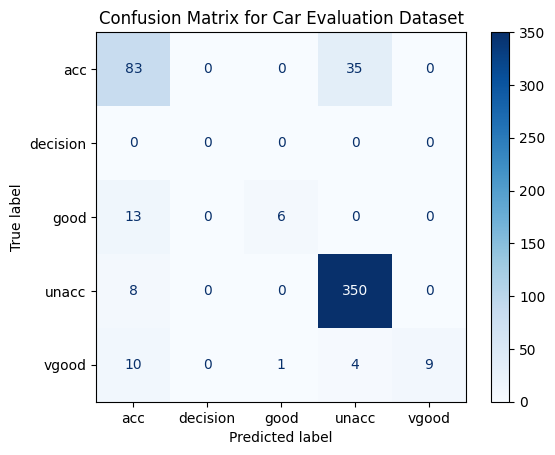

In [29]:
## TASK-3
## Plot a Confusion Matrix for the results of the Car evaluation dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd


data = pd.read_csv('car_evaluation.csv', header=None)

# Assign column names based on dataset documentation
data.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

# Encode categorical variables
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Split features and target
X = data.drop("class", axis=1)
y = data["class"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['class'].classes_)
disp.plot(cmap=plt.cm.Blues, values_format='d')

plt.title("Confusion Matrix for Car Evaluation Dataset")
plt.show()


In [38]:
## TASK-4
## Print a Classification Report for the results of the Car evaluation dataset
from sklearn.metrics import classification_report

# 1. Check the unique labels in y
unique_labels = np.unique(y)
print("Unique labels in y:", unique_labels)

# 2. Check the inverse transformation of the labels
try:
    target_names = label_encoders['class'].inverse_transform(unique_labels)  # Decode all unique labels at once
    print("Target names:", target_names)
except Exception as e:
    print(f"Error in inverse_transform: {e}")

# 3. Check if the labels in y_test and y_pred are matching with the unique labels
print("Unique labels in y_test:", np.unique(y_test))
print("Unique labels in y_pred:", np.unique(y_pred))

# Ensure that the labels in y_test and y_pred are a subset of unique_labels
if not set(np.unique(y_test)).issubset(set(unique_labels)):
    print("Warning: Some labels in y_test are not in the unique_labels.")
if not set(np.unique(y_pred)).issubset(set(unique_labels)):
    print("Warning: Some labels in y_pred are not in the unique_labels.")

# 4. Generate the classification report
try:
    print("Classification Report:")
    print(classification_report(y_test, y_pred, labels=unique_labels, target_names=target_names))
except Exception as e:
    print(f"Error generating classification report: {e}")








Unique labels in y: [0 1 2 3 4]
Target names: [0 1 2 3 4]
Unique labels in y_test: [0 2 3 4]
Unique labels in y_pred: [0 2 3 4]
Classification Report:
Error generating classification report: object of type 'numpy.int64' has no len()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6647398843930635


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


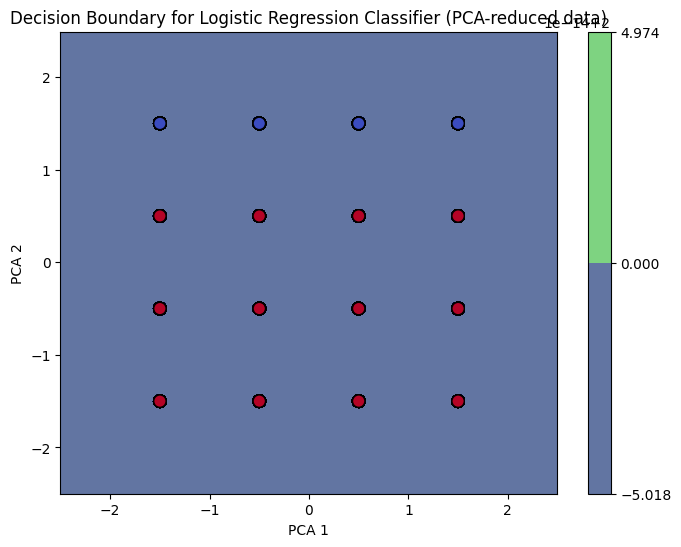

In [46]:
## TASK-5
## Plot the Decision boundary diagram for the classifier of the Car evaluation dataset


# Load the Car Evaluation dataset
data = pd.read_csv('car_evaluation.csv', header=None)

# Assign column names based on dataset documentation
data.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

# Encode categorical features into numerical values
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Features and target variable
X = df.drop('class', axis=1)
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Logistic Regression classifier on all 6 features
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Reduce the dimensionality of X to 2 features using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a mesh grid for plotting the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict class labels for all points in the mesh grid in the PCA space
Z = clf.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.colorbar()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', s=80, cmap=plt.cm.coolwarm)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Decision Boundary for Logistic Regression Classifier (PCA-reduced data)')
plt.show()






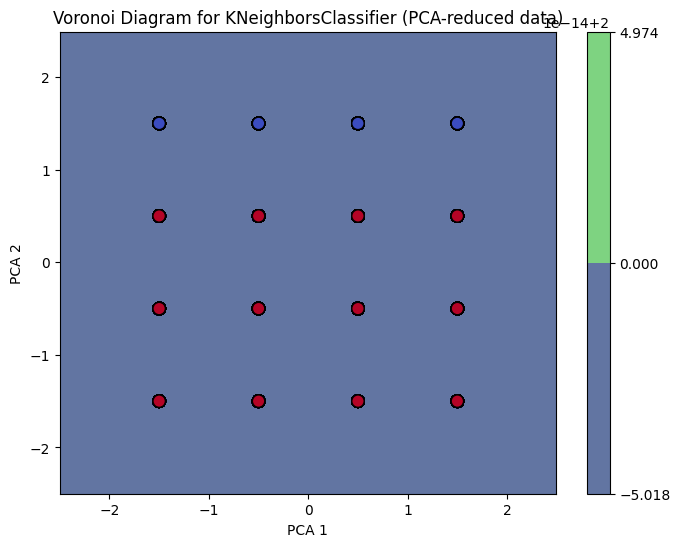

In [47]:
## TASK-6
## Plot the Voronoi diagram for the classifier of the Car evaluation dataset



# Plotting the Voronoi diagram
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.colorbar()

# Plot the training points
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', marker='o', s=80, cmap=plt.cm.coolwarm)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Voronoi Diagram for KNeighborsClassifier (PCA-reduced data)')
plt.show()


### Questions to Think About and Answer
1. **In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the _weights_ set to 'uniform' and then set to 'distance'. Find out the difference between these two.**  

When applying the **K-Nearest Neighbors (KNN)** algorithm, the choice of **distance weighting** affects how the algorithm assigns importance to the neighbors in making its predictions. The two key options for the weights parameter in KNN are 'uniform' and 'distance'.

### 1. **Uniform Weights**:
When the weights parameter is set to 'uniform', **all neighbors are given equal importance** when making predictions. Regardless of how far or close a neighbor is, its influence on the prediction is the same. The prediction is made based on a simple majority vote, where the class with the most occurrences among the nearest neighbors is chosen as the predicted class.

- **Effect**: In this case, the classifier treats all neighbors the same, so the decision boundary may be more jagged and sensitive to outliers, as far neighbors contribute equally to the decision.
- **Use case**: The uniform weight approach works well when all neighbors are assumed to be equally important and when the data is relatively evenly distributed, without extreme variations in distance between neighbors.

### 2. **Distance Weights**:
When the weights parameter is set to 'distance', **closer neighbors are given more influence** than farther ones. Specifically, the weight of each neighbor is inversely proportional to its distance from the query point. Neighbors that are closer to the point being classified have more influence in the decision, making them more significant in determining the predicted class.

- **Effect**: With distance weighting, the decision boundary tends to be smoother and more responsive to local patterns in the data, as closer neighbors have a greater influence on the prediction. This approach can be more robust to noisy data or outliers, as distant points have less influence.
- **Use case**: This approach is ideal when the assumption is that nearby data points are more likely to belong to the same class and should, therefore, be weighted more heavily.


- **Uniform Weights**: All neighbors contribute equally, regardless of their distance from the query point. The decision boundary is generally more jagged and sensitive to outliers.
- **Distance Weights**: Closer neighbors have more influence on the prediction, leading to smoother decision boundaries that are more responsive to local data patterns. It’s more robust to outliers and noise.

### Example:
- If you’re classifying a point near the center of a cluster of similar points, the `'uniform'` weight approach might give equal importance to distant points from another cluster, potentially affecting the classification. On the other hand, with the `'distance'` setting, points closer to the query point will dominate the decision, making the classifier more sensitive to the local structure of the data.

the choice between both the methods depends on the nature of the dataset and the task at hand.
2. **What do you think could be the drawbacks of using KNN ?**

K-Nearest Neighbors (KNN) is a popular and intuitive machine learning algorithm, but it does come with several significant drawbacks that can affect its performance in certain scenarios.

 **Computational Cost**:
One of the main drawbacks of KNN is its **high computational cost** during the prediction phase. KNN is a lazy learning algorithm, meaning it does not build an explicit model during the training phase. Instead, it stores the entire dataset and performs computation during inference. Specifically, to classify a new point, KNN calculates the distance between the query point and every point in the training dataset, which can be very time-consuming for large datasets. As the size of the dataset grows, the number of distance calculations grows linearly, leading to slower prediction times. For datasets with millions of points, this can be prohibitively expensive, making KNN unsuitable for real-time applications or large-scale datasets.

 **Sensitive to Irrelevant Features**:
KNN relies on distance metrics (such as Euclidean distance) to determine the nearest neighbors. This means that the algorithm can be highly sensitive to **irrelevant or redundant features**. If the dataset contains irrelevant features that don't contribute meaningfully to the classification task, they can distort the distance calculations and degrade the algorithm's performance. The presence of such features can cause the algorithm to make inaccurate predictions, as irrelevant features can end up dominating the distance metric. Feature selection or dimensionality reduction techniques like PCA (Principal Component Analysis) are often required to improve KNN's performance.

 **Curse of Dimensionality**:
KNN suffers from what is known as the **curse of dimensionality**. As the number of features (dimensions) in the dataset increases, the distance between data points becomes less meaningful. In high-dimensional spaces, points tend to be more spread out, and the concept of "nearest" neighbors becomes less effective because the distances between all points become similar. In such cases, KNN's ability to classify accurately diminishes because the algorithm struggles to differentiate between neighbors. This problem is particularly severe in datasets with a large number of features, where the sparsity of data in high dimensions reduces the effectiveness of the algorithm.

 **Memory Intensive**:
Since KNN is a **lazy learner**, it does not build a model during the training phase but instead memorizes the entire dataset. This means that all training data needs to be stored in memory for future predictions. For large datasets, this can result in high memory usage, as the algorithm needs to store each training example, including its label. In environments where memory is limited, such as embedded systems or low-resource devices, this can be a significant drawback. Additionally, as the dataset grows, both the storage requirements and the prediction time grow, making the algorithm less scalable compared to other models like decision trees or linear classifiers that summarize the data during training.

 **Impact of Outliers**:
KNN is **sensitive to outliers** because it treats all neighbors equally, regardless of their relevance to the classification task. Outliers—points that significantly differ from the rest of the data—can have a disproportionate effect on the decision boundaries, especially in cases where the query point is close to an outlier. Since KNN classifies based on majority voting, an outlier within the nearest neighbors can incorrectly influence the classification of the query point. For instance, if a query point has an outlier as one of its nearest neighbors, KNN might assign it the wrong label, leading to misclassification. This problem is more pronounced in datasets with noisy or improperly labeled data.

While KNN is easy to understand and implement, its **computational inefficiency**, **sensitivity to irrelevant features**, and **difficulty in handling high-dimensional data** make it less suitable for certain applications, particularly with large datasets or datasets with many features. Additionally, its **sensitivity to outliers** can affect its performance in noisy environments. These drawbacks highlight the importance of carefully considering the problem at hand when choosing KNN, and the potential need for preprocessing steps like dimensionality reduction, feature selection, or outlier removal.

### Useful Resources for further reading
1. Interactive KNN visualization, with class boundaries: http://vision.stanford.edu/teaching/cs231n-demos/knn/  
